### A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import WhatHappened as t
import seaborn as sns
%matplotlib inline

df = pd.read_csv('crime.csv',header=0,encoding = 'unicode_escape')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [2]:
df.shape

(319073, 17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62cd2efb38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f62cd112ba8>]], dtype=object)

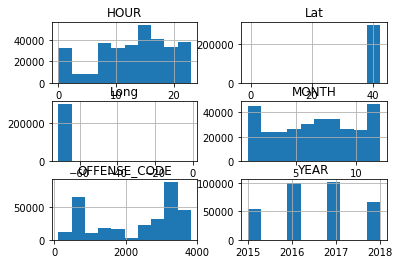

In [4]:
df.hist()

In [4]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


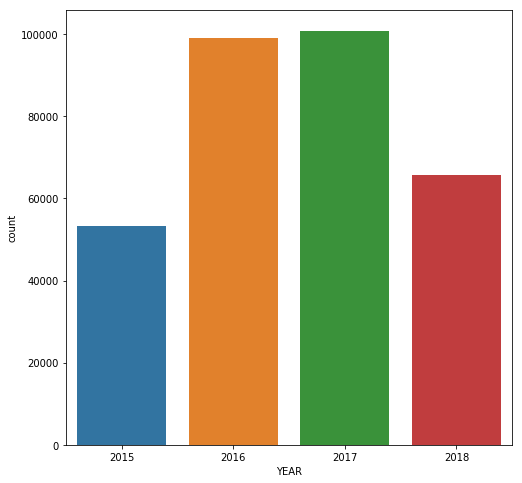

In [8]:
plt.figure(figsize=(8,8))    
sns.countplot(x=df.YEAR)  
plt.show()

##### General Overview On Data
    * The crimes start early in the morning and have peak in the evening. There is also a peak in the middle of day, at 12:00.
    * The crime rate increases  in winter.
    * In 2016 and 2017 the crime rate is nearly 100,000. In 2018, it decreases to nearly 60,000.
    * There are 1055 shooting incident from 2015 to 2018.

In [6]:
 df.isnull().sum(axis = 0)

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [8]:
df["SHOOTING"].unique()

array([nan, 'Y'], dtype=object)

#### Data Cleaning
Shooting field is has very few data but it is an important data about serious crimes so it is better to keep it. 
Lat and Long have unknown values recorded as -1. They should change to null values.

In [7]:
# Fill N in nans in SHOOTING column
df.SHOOTING.fillna('N', inplace=True)
# Replace -1 values in Lat/Long with Nan
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

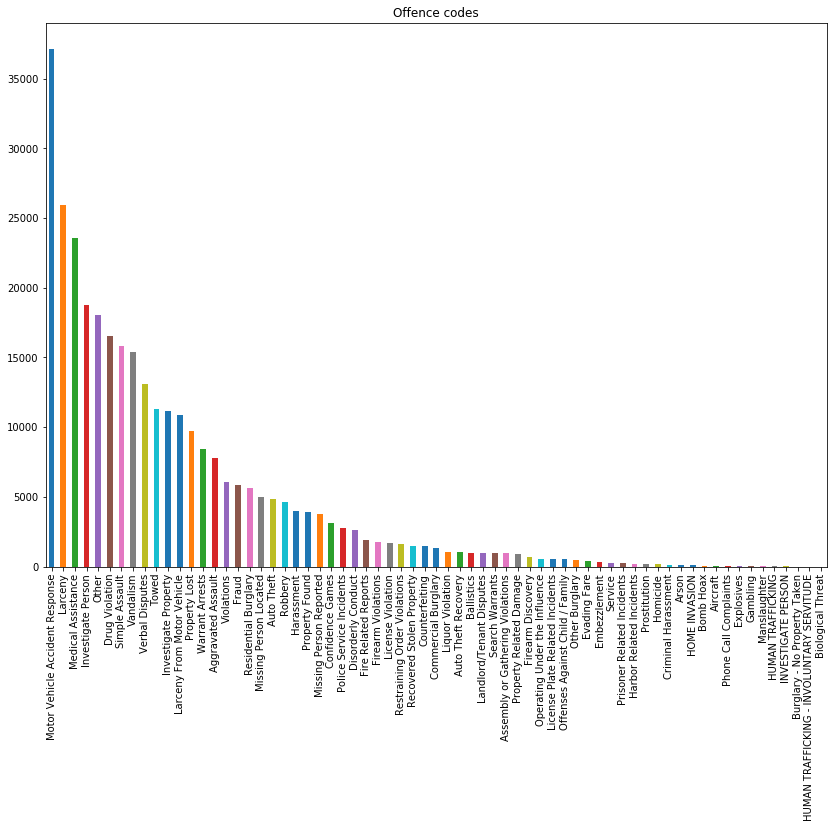

In [8]:
status_vals =df.OFFENSE_CODE_GROUP.value_counts() #Provide a pandas series of the counts for each Professional status


fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

(status_vals).plot(kind="bar");
plt.title("Offence codes");

#### Order in Crime Rate
* Motor vehicle accident is the top incedent in Boston. The third and forth one medical assistance and investigation.
* The second, 6th, 7th, 8th ones are about serious crime incidents; Larceny, Drug Violation

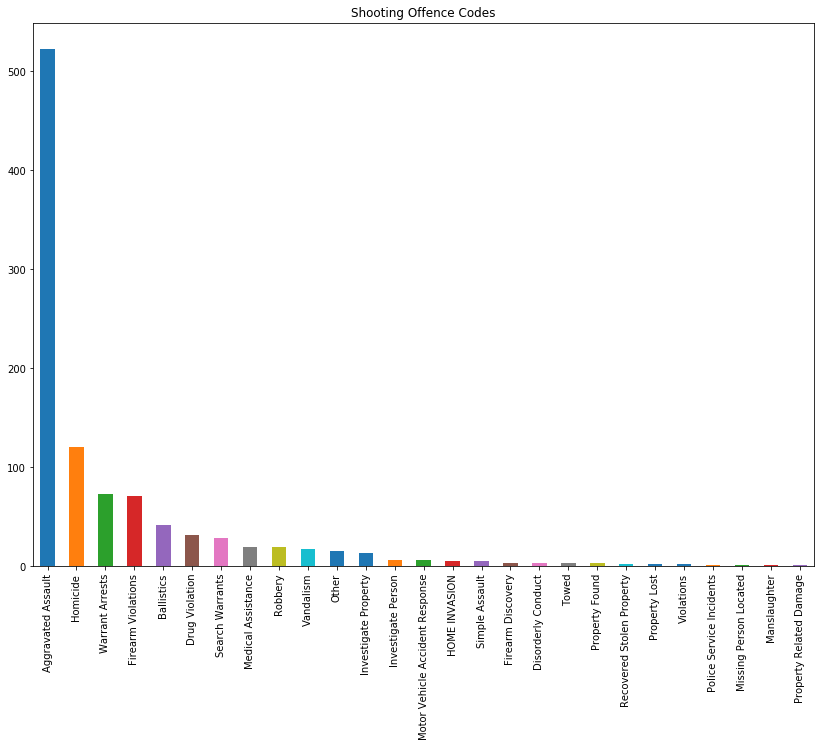

In [11]:
status_vals = df.loc[df.SHOOTING=="Y"].OFFENSE_CODE_GROUP.value_counts()


fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

(status_vals).plot(kind="bar");
plt.title("Shooting Offence Codes");

In [9]:
df.loc[df.SHOOTING=="Y"].OFFENSE_CODE_GROUP.value_counts().sum() / df.OFFENSE_CODE_GROUP.value_counts().sum()

0.0031936265368740068

#### About Shooting Crimes 
 
    * The whole shooting crime rate is %.3
    * Top of the shooting crimes are "Aggravated Assault", "Homicide", "Warrant Arrest". 
    

In [27]:
df["UCR_PART"].unique()


array(['Part One', 'Part Two', 'Part Three', 'Other', nan], dtype=object)

#### UCR Offense Category

Crime seriousness level is high in "Part One" category and its level decreasing in "Part Two" and "Part Three" respectively.


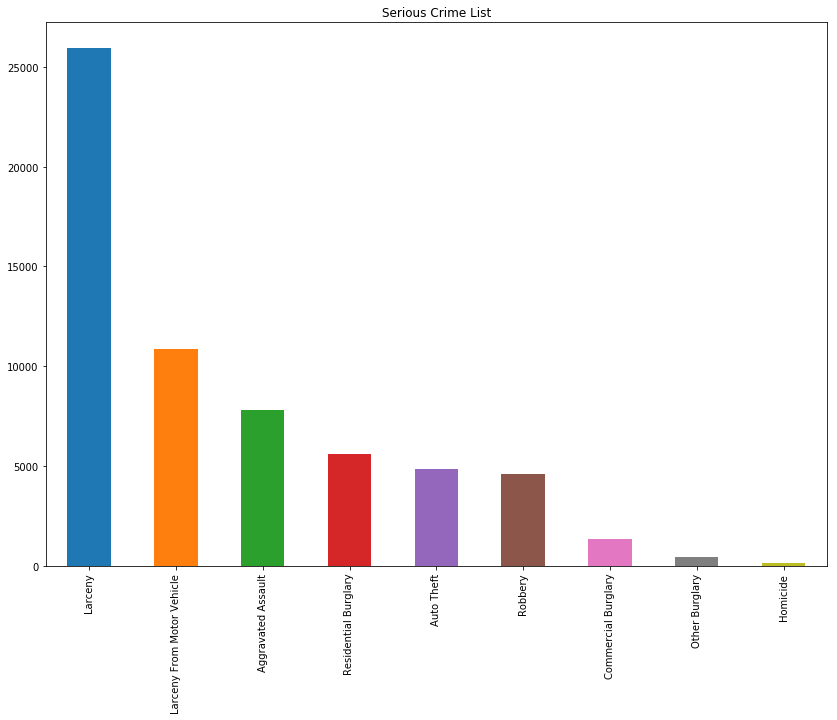

In [15]:
status_vals = df.loc[(df["UCR_PART"] == "Part One")]
status_vals = status_vals.OFFENSE_CODE_GROUP.value_counts()

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

status_vals.plot(kind="bar");
plt.title("Serious Crime List");


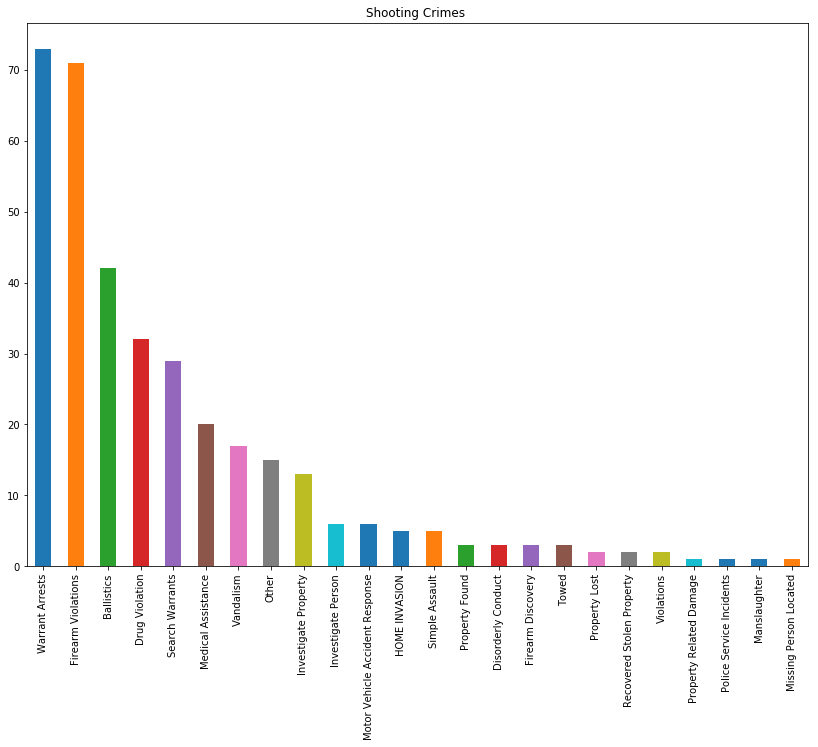

In [17]:
#status_vals = df.loc[(df.SHOOTING=="Y") & (df["UCR_PART"] != "Part One")].OFFENSE_CODE_GROUP.value_counts()
status_vals = df.loc[(df.SHOOTING=="Y") & (df["UCR_PART"] != "Part One")]
status_vals = status_vals.OFFENSE_CODE_GROUP.value_counts()

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

status_vals.plot(kind="bar");
plt.title("Shooting Crimes ");

#### Shooting in Part 2 and Part3 Offence Category
The top three of shooting crimes are "Warrent Arrests", "Firearm Violation", and "Ballistics". There are shooting crimes in not serious incident category like "Medical Assistance", "Property Lost".

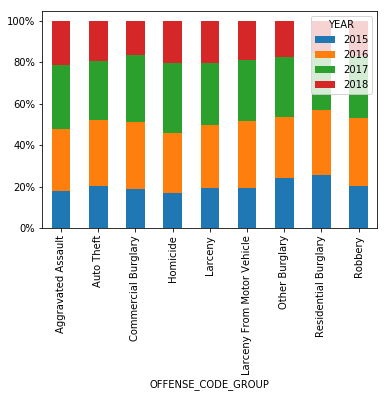

In [9]:
import matplotlib.ticker as mtick
status_vals = df.loc[(df["UCR_PART"] == "Part One")]
status_vals.groupby(['OFFENSE_CODE_GROUP','YEAR']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

#### Serious Crimes 
There are more serious crimes in 2016 and 2017. It decreases in 2018

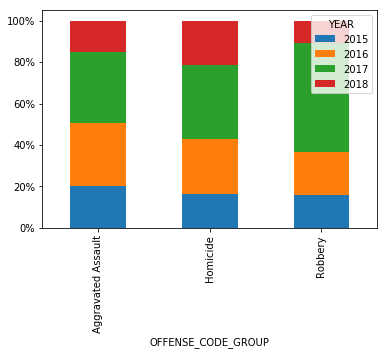

In [18]:
import matplotlib.ticker as mtick
status_vals = df.loc[(df.SHOOTING=="Y") & (df["UCR_PART"] == "Part One")]
status_vals.groupby(['OFFENSE_CODE_GROUP','YEAR']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title = "Shooting in Serious Crime Category"
plt.show()

#### Shooting in Serious Crimes
There area there offence group "Aggravated Assault", "Homicide", and "Robbery" that have shooting crimes. 

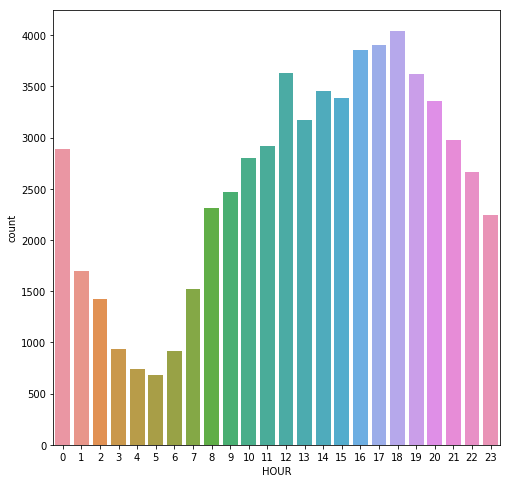

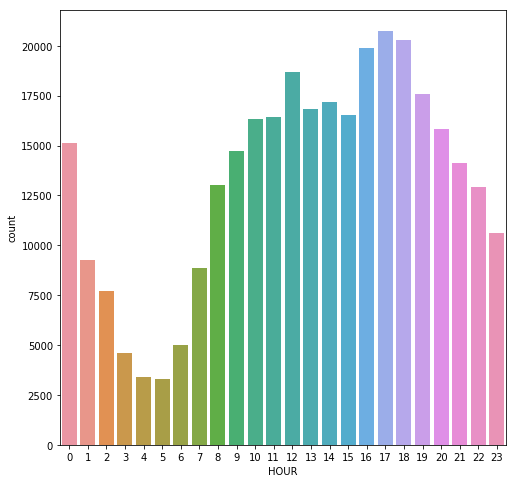

In [43]:
status_vals = df.loc[(df["UCR_PART"] == "Part One")]
plt.figure(figsize=(8,8))    
sns.countplot(x=status_vals.HOUR)  
plt.show() 

status_vals = df.loc[(df["UCR_PART"] != "Part One")]
plt.figure(figsize=(8,8))    
sns.countplot(x=df.HOUR)  
plt.show()

#### About Crime Hour
The crime rate is higher around 18 : 00. There is not much difference in crime seriousness ??? 

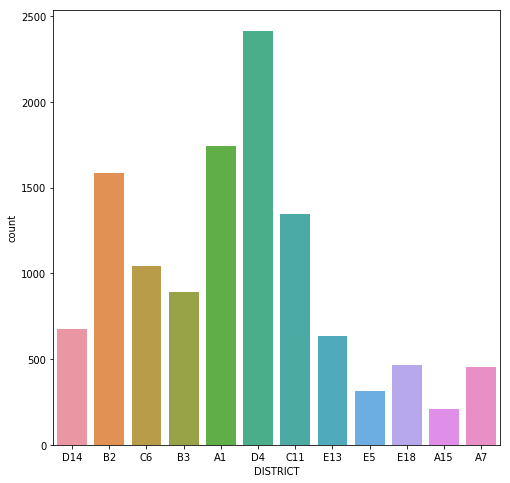

In [12]:
status_vals = df.loc[(df["UCR_PART"] == "Part One") & (df["YEAR"] == 2018)]

plt.figure(figsize=(8,8))    
sns.countplot(x=status_vals.DISTRICT)  
plt.show()

#### High Crime Rate Districts

D4 (Back Bay/South End/Fenway), B2(Roxbury/Mission Hill) and A1( Downtown, Beacon Hill, Charlestown) have the highest crime rate in Boston.
http://www.wikizero.biz/index.php?q=aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvQm9zdG9uX1BvbGljZV9EZXBhcnRtZW50


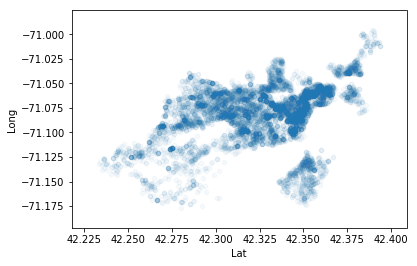

In [28]:
# Plot districts
status_vals = df.loc[(df["UCR_PART"] == "Part One") & (df["YEAR"] == 2018)]



status_vals.plot(kind="scatter", x="Lat", y="Long",   alpha=0.04)

#status_vals.plot(kind="scatter", x="Lat", y="Long", alpha=0.4, label=status_vals.groupby('DISTRICT').size(), cmap=plt.get_cmap("jet"), 
#                 colorbar=True)
#plt.legend()
